1. Cargar Librerias

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
import networkx as nx
import matplotlib.pyplot as plt

2. Crear data frame a partir de archivo csv

In [2]:
dataframe = pd.read_csv('comtrade_trade_data.csv')
dataframe

,Period,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
0,2012,Import,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,36481708,4.522996e+08,Weight in kilograms,4.522996e+08,0
1,2012,Export,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,67030555,1.026560e+09,Weight in kilograms,1.026560e+09,0
2,2012,Import,Albania,Algeria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,28700,2.738750e+05,Weight in kilograms,2.738750e+05,0
3,2012,Import,Albania,Austria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,898,8.500000e+02,Weight in kilograms,8.500000e+02,0
4,2012,Import,Albania,Belgium,H4-2523,Salt; sulphur; earths and stone; plastering ma...,1028,1.020000e+02,Weight in kilograms,1.020000e+02,0
...,...,...,...,...,...,...,...,...,...,...,...
116812,2010,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",59578,2.910000e+05,Weight in kilograms,2.910000e+05,0
116813,2010,Import,Cook Isds,New Zealand,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",95945,1.372140e+05,Weight in kilograms,1.372140e+05,0
116814,2011,Import,Cook Isds,World,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",659681,3.845930e+05,Weight in kilograms,3.845930e+05,0
116815,2011,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",36232,7.011600e+04,Weight in kilograms,7.011600e+04,0


3. Limpieza de datos

In [3]:
dataframe.dropna()

,Period,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
0,2012,Import,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,36481708,4.522996e+08,Weight in kilograms,4.522996e+08,0
1,2012,Export,Albania,World,H4-2523,Salt; sulphur; earths and stone; plastering ma...,67030555,1.026560e+09,Weight in kilograms,1.026560e+09,0
2,2012,Import,Albania,Algeria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,28700,2.738750e+05,Weight in kilograms,2.738750e+05,0
3,2012,Import,Albania,Austria,H4-2523,Salt; sulphur; earths and stone; plastering ma...,898,8.500000e+02,Weight in kilograms,8.500000e+02,0
4,2012,Import,Albania,Belgium,H4-2523,Salt; sulphur; earths and stone; plastering ma...,1028,1.020000e+02,Weight in kilograms,1.020000e+02,0
...,...,...,...,...,...,...,...,...,...,...,...
116812,2010,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",59578,2.910000e+05,Weight in kilograms,2.910000e+05,0
116813,2010,Import,Cook Isds,New Zealand,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",95945,1.372140e+05,Weight in kilograms,1.372140e+05,0
116814,2011,Import,Cook Isds,World,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",659681,3.845930e+05,Weight in kilograms,3.845930e+05,0
116815,2011,Import,Cook Isds,Fiji,H0-2523,"Cement (portland, aluminous, slag or hydraulic)",36232,7.011600e+04,Weight in kilograms,7.011600e+04,0


4. Las columnas del dataframe:

In [11]:
dataframe.columns

Index(['Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity Code',
       ' Commodity Description', 'Trade Value', 'NetWeight (kg)', 'Unit',
       'Trade Quantity', 'Flag'],
      dtype='object')

5. Los tipos de datos de cada columna:

In [12]:
dataframe.dtypes

Period                      int64
Trade Flow                 object
Reporter                   object
Partner                    object
Commodity Code             object
 Commodity Description     object
Trade Value                 int64
NetWeight (kg)            float64
Unit                       object
Trade Quantity            float64
Flag                        int64
dtype: object

6. Revisar la clasificacion de los datos (Commodity Description) para validar que todas las clasificaciones pertenecen al comercio de cemento

In [13]:
dataframe.groupby(' Commodity Description').count()

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Commodity Description,,,,,,,,,,
"Cement (portland, aluminous, slag or hydraulic)",43206,43206,43206,43206,43206,43206,43174,43206,43110,43206
"Portland cement, aluminous cement, slag cement",26205,26205,26205,26205,26205,26205,26057,26205,25759,26205
"Portland cement, aluminous cement, slag cement, supersulphate cement and similar hydraulic cements, whether or not coloured or in the form of clinkers.",24981,24981,24981,24981,24981,24981,24729,24981,23739,24981
"Salt; sulphur; earths and stone; plastering materials, lime and cement // Portland cement, aluminous cement, slag cement, supersulphate cement and similar hydraulic cements, whether or not coloured or in the form of clinkers.",22425,22425,22425,22425,22425,22425,22123,22425,21521,22425


7. Revisar las opciones de Flujo comercial

In [14]:
dataframe.groupby('Trade Flow').count()

,Period,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Trade Flow,,,,,,,,,,
Export,56642,56642,56642,56642,56642,56642,56373,56642,55389,56642
Import,57744,57744,57744,57744,57744,57744,57301,57744,56396,57744
Re-Export,2109,2109,2109,2109,2109,2109,2091,2109,2040,2109
Re-Import,322,322,322,322,322,322,318,322,304,322


8. Revisar la cantidad de países de la base de datos

In [15]:
dataframe.groupby('Reporter').count()

,Period,Trade Flow,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Reporter,,,,,,,,,,
Afghanistan,4,4,4,4,4,4,4,4,4,4
Albania,355,355,355,355,355,355,355,355,355,355
Algeria,633,633,633,633,633,633,633,633,633,633
Andorra,115,115,115,115,115,115,115,115,115,115
Angola,236,236,236,236,236,236,236,236,236,236
...,...,...,...,...,...,...,...,...,...,...
Viet Nam,503,503,503,503,503,503,358,503,136,503
Wallis and Futuna Isds,63,63,63,63,63,63,63,63,63,63
Yemen,255,255,255,255,255,255,253,255,235,255


9. Revisar los periodos que incluye la base datos

In [16]:
dataframe.groupby('Period').count()

,Trade Flow,Reporter,Partner,Commodity Code,Commodity Description,Trade Value,NetWeight (kg),Unit,Trade Quantity,Flag
Period,,,,,,,,,,
1988,381,381,381,381,381,381,381,381,381,381
1989,837,837,837,837,837,837,837,837,837,837
1990,943,943,943,943,943,943,943,943,943,943
1991,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
1992,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
1993,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
1994,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
1995,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
1996,3500,3500,3500,3500,3500,3500,3500,3500,3500,3500


10. Mostrar los 5 principales exportadores por año

In [17]:
a = dataframe[ dataframe['Trade Flow']=='Import'].groupby(['Period','Reporter']).agg({'Trade Value':sum})
a

Trade Value
Period Reporter                             
1988   Australia                    17464250
       Finland                      19051630
       Fmr Fed. Rep. of Germany    199688000
       Greece                        2082964
       Iceland                        705980
...                                      ...
2016   Togo                         48137596
       Turkey                       33052978
       USA                        2085455408
       United Kingdom              200519572
       Zimbabwe                     23896528

[3697 rows x 1 columns]

In [18]:
b = a['Trade Value'].groupby('Period',group_keys=False)
b

In [21]:
c = b.nlargest(5)
c

Period  Reporter                
1988    Japan                        344940554
        Fmr Fed. Rep. of Germany     199688000
        Switzerland                   40377457
        Finland                       19051630
        Rep. of Korea                 18182366
                                       ...    
2016    USA                         2085455408
        Sri Lanka                   1072375634
        France                       672679733
        Philippines                  671712580
        Germany                      361673976
Name: Trade Value, Length: 145, dtype: int64

In [26]:
c.to_csv('c.csv')

In [29]:
df = pd.read_csv('c.csv')
df

,Period,Reporter,Trade Value
0,1988,Japan,344940554
1,1988,Fmr Fed. Rep. of Germany,199688000
2,1988,Switzerland,40377457
3,1988,Finland,19051630
4,1988,Rep. of Korea,18182366
...,...,...,...
140,2016,USA,2085455408
141,2016,Sri Lanka,1072375634
142,2016,France,672679733
143,2016,Philippines,671712580


In [30]:
alt.Chart(df).mark_bar().encode(
    x='Period',
    y='Trade Value',
    color='Reporter'
)

alt.Chart(...)

In [32]:
alt.Chart(df).mark_bar().encode(
    x='Reporter:O',
    y='Trade Value:Q',
    color='Reporter:N',
    column='Period:N'
)

alt.Chart(...)

In [47]:
e = dataframe[(dataframe['Trade Flow']=='Import') & (dataframe['Period']==1988)].groupby(['Reporter','Partner']).agg({'Trade Value':sum})
e

Trade Value
Reporter  Partner                              
Australia Areas, nes                      35854
          Brazil                            622
          China                          346641
          Denmark                        215665
          Fmr Fed. Rep. of Germany         3634
...                                         ...
Thailand  Malaysia                        83882
          Netherlands                     58702
          Singapore                      228471
          USA                             14276
          World                          964263

[154 rows x 1 columns]

In [48]:
e.groupby('Reporter').count()

,Trade Value
Reporter,
Australia,22
Finland,14
Fmr Fed. Rep. of Germany,24
Greece,16
Iceland,9
India,6
Japan,13
Portugal,9
Rep. of Korea,14


In [49]:
e.groupby('Partner').count()

,Trade Value
Partner,
"Areas, nes",9
Austria,3
Belgium-Luxembourg,7
Brazil,2
Bulgaria,1
Canada,2
China,3
"China, Hong Kong SAR",1
Czechoslovakia,2


In [9]:
e.to_csv('e.csv')

In [5]:
importers1988 = pd.read_csv('e.csv')
importers1988

,Reporter,Partner,Trade Value
0,Australia,"Areas, nes",35854
1,Australia,Brazil,622
2,Australia,China,346641
3,Australia,Denmark,215665
4,Australia,Fmr Fed. Rep. of Germany,3634
...,...,...,...
149,Thailand,Malaysia,83882
150,Thailand,Netherlands,58702
151,Thailand,Singapore,228471
152,Thailand,USA,14276


In [55]:
importers1988['percent'] =(importers1988['Trade Value'] / importers1988['Trade Value'].sum())*100000
importers1988

,Reporter,Partner,Trade Value,percent
0,Australia,"Areas, nes",35854,5.493317
1,Australia,Brazil,622,0.095299
2,Australia,China,346641,53.110078
3,Australia,Denmark,215665,33.042788
4,Australia,Fmr Fed. Rep. of Germany,3634,0.556778
...,...,...,...,...
149,Thailand,Malaysia,83882,12.851854
150,Thailand,Netherlands,58702,8.993938
151,Thailand,Singapore,228471,35.004840
152,Thailand,USA,14276,2.187276


In [6]:
G=nx.Graph()

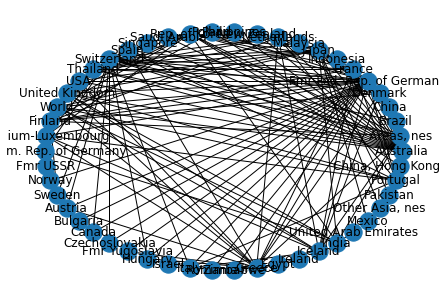

In [50]:
nx.draw_circular(G,with_labels=True,cmap=plt.cm.Blues)
#node_size=pesos1988i
#node_color=range(154)

In [52]:
nx.number_of_nodes(G)

50

In [53]:
nx.number_of_edges(G)

151

In [54]:
nx.degree_centrality(G)

{'Australia': 0.44897959183673464,
 'Areas, nes': 0.18367346938775508,
 'Brazil': 0.04081632653061224,
 'China': 0.061224489795918366,
 'Denmark': 0.14285714285714285,
 'Fmr Fed. Rep. of Germany': 0.6122448979591836,
 'France': 0.2040816326530612,
 'Indonesia': 0.061224489795918366,
 'Japan': 0.3469387755102041,
 'Malaysia': 0.04081632653061224,
 'Netherlands': 0.18367346938775508,
 'New Zealand': 0.02040816326530612,
 'Philippines': 0.02040816326530612,
 'Poland': 0.061224489795918366,
 'Rep. of Korea': 0.3061224489795918,
 'Saudi Arabia': 0.04081632653061224,
 'Singapore': 0.061224489795918366,
 'Spain': 0.1020408163265306,
 'Switzerland': 0.42857142857142855,
 'Thailand': 0.2040816326530612,
 'USA': 0.16326530612244897,
 'United Kingdom': 0.2040816326530612,
 'World': 0.22448979591836732,
 'Finland': 0.2857142857142857,
 'Belgium-Luxembourg': 0.14285714285714285,
 'Fmr Dem. Rep. of Germany': 0.061224489795918366,
 'Fmr USSR': 0.02040816326530612,
 'Norway': 0.04081632653061224,
 'Sw

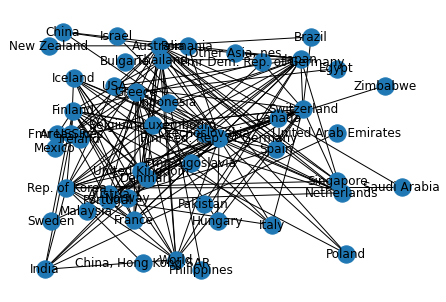

In [57]:
nx.draw_random(G, with_labels=True)